In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
dataframe_o3 = pd.read_csv("data/raw/ticket-o3.csv", usecols = ['titolo','messaggio','categoria'])
dataframe_gc = pd.read_csv("data/raw/ticket-gemini-claude.csv", usecols = ['titolo','messaggio','categoria'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\proge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\proge\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\proge\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
dataframe = pd.concat([dataframe_o3,dataframe_gc])
print(dataframe)

                                                titolo  \
0                                         Login Errore   
1                                Modifica Dati Profilo   
2                            Assistenza Sistema Scuola   
3                      Errore Prenotazione Ricevimento   
4                        Problema Visualizzazione Voti   
..                                                 ...   
445  Informazioni Tasse Scolastiche - Mancanza di C...   
446  Cambio Classe - Richiesta Respinta Senza Motiv...   
447       Documenti Smarriti - Richiesta di Assistenza   
448             Contatto Segreteria - Nessuna Risposta   
449   Problemi di Connessione - Rete Lenta e Instabile   

                                             messaggio   categoria  
0    Buongiorno, sto riscontrando un problema con i...     Accesso  
1    Salve, ho notato che i miei dati di contatto n...     Profilo  
2    Buonasera, utilizzo regolarmente la piattaform...   Didattica  
3    Gentile team, ho prova

In [26]:
x=dataframe['categoria'].value_counts()
print(x)

categoria
Segreteria    866
Didattica     707
Accesso       384
Profilo       374
Tecnico       279
Name: count, dtype: int64


<Axes: xlabel='categoria', ylabel='count'>

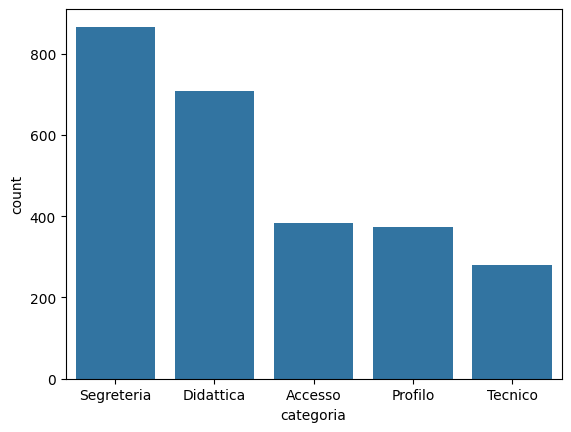

In [32]:
sns.barplot(x)

In [33]:
train_set, test_set = train_test_split(dataframe, random_state=42, test_size=0.2)
print(train_set.shape, test_set.shape)

(2088, 3) (522, 3)
